In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Q1a) If we allow ourselves to evaluate function $f$ at four points $(x\pm\delta)$ and $(x\pm2\delta)$ what should our estimate of the first derivative of $x$ be? (Combine derivative from $(x\pm\delta)$ and $(x\pm2\delta)$  to cancel next term in Taylor series)

We can use the Taylor series expansions of $f(x\pm\delta),f(x\pm2\delta)$ to compute $f^{'}$ as addition the two series expansions together will allow us to cancel the 3rd order term in the series. We begin by noting the expansions;

\begin{equation}
f(x\pm\delta) = f(x) + f^{'}(x)(\pm \delta) + \frac{1}{2}f^{''}(x)(\pm \delta)^2  + \frac{1}{6}f^{'''}(x)(\pm \delta)^3 +  \frac{1}{24}f^{''''}(x)(\pm \delta)^4 + \frac{1}{120}f^{'''''}(x)(\pm \delta)^5 \dots \\
f(x\pm2\delta) = f(x) + f^{'}(x)(\pm 2\delta) + \frac{1}{2}f^{''}(x)(\pm 2\delta)^2  + \frac{1}{6}f^{'''}(x)(\pm 2\delta)^3 +  \frac{1}{24}f^{''''}(x)(\pm 2\delta)^4 + \frac{1}{120}f^{'''''}(x)(\pm 2\delta)^5 \dots 
\end{equation}

which implies that all even order terms will cancel when we take the differences: $f(x+\delta) - f(x-\delta)$ or $f(x+2\delta) - f(x-2\delta)$. Hence, adding the two derivative approximations together with certain multiplicative factors allow for higher order terms to cancel, yielding a higher order truncation error (order $> 3$ from $f(x\pm\delta)$ that we saw in class). We can determine the proper factors by looking at the expressions for each 5th order expansion;

\begin{equation}
\frac{f(x+\delta) - f(x-\delta)}{2\delta} = \frac{2f^{'}(x)(\delta) + \frac{1}{3}f^{'''}(x)(\delta)^3 + \frac{1}{60}f^{'''''}(x)(\delta)^5}{2\delta} = f^{'}(x) + \frac{1}{6}f^{'''}(x)(\delta)^2 + \frac{1}{120}f^{'''''}(x)(\delta)^4 \\
\frac{f(x+2\delta) - f(x-2\delta)}{4\delta} = \frac{4f^{'}(x)(\delta) + \frac{8}{3}f^{'''}(x)(\delta)^3 + \frac{8}{15}f^{'''''}(x)(\delta)^5}{4\delta} = f^{'}(x) + \frac{2}{3}f^{'''}(x)(\delta)^2 + \frac{16}{120}f^{'''''}(x)(\delta)^4
\end{equation}

where subtracting the second equation from 4 times the first equation and dividing by 3 yields;

\begin{equation}
\frac{1}{3}[4(\frac{f(x+\delta) - f(x-\delta)}{2\delta}) - \frac{f(x+2\delta)-f(x-2\delta)}{4\delta}] = f^{'}(x) - \frac{1}{30}f^{'''''}(x)\delta^4 \\
\implies \text{4 Point Derivative Approximation} = f^{'}(x) - \frac{1}{30}f^{'''''}(x)\delta^4.
\end{equation}

Therefore, our estimate on the first derivative at $x$ will be 
\begin{equation}
f^{'}(x) \approx \frac{8f(x+\delta) +f(x-2\delta)-8f(x-\delta)-f(x+2\delta)}{12\delta}.
\end{equation}

# Q1b) What should $\delta$ be in terms of machine precision and various properties of the function? Show for $f(x) = exp(x), f(x) = exp(0.01x)$ that your estimate of the optimal $\delta$ is at least roughly correct.

As calculated above, the truncation error $\epsilon_{t}$ on our derivative is given by 
\begin{equation}
\epsilon_{t} = \frac{1}{30}f^{'''''}\delta^4.
\end{equation}

Therefore, we can add this to the roundoff error arising from the 4 function evaluations to get the total error calculated as

\begin{equation}
\epsilon_{tot} = f^{'}(x) - \frac{8f(x+\delta)(1+g_0\epsilon_m) +f(x-2\delta)(1+g_1\epsilon_m)-8f(x-\delta)(1+g_2\epsilon_m)-f(x+2\delta)(1+g_3\epsilon_m)}{12\delta} \\
\epsilon_{tot} = \frac{1}{30}f^{'''''}(x)\delta^4 - \frac{8f(x+\delta)g_0\epsilon_m +f(x-2\delta)g_1\epsilon_m-8f(x-\delta)g_2\epsilon_m-f(x+2\delta)g_3\epsilon_m}{12\delta} \\
\implies \epsilon_{tot} \approx \frac{1}{30}f^{'''''}\delta^4 - \frac{f(x)(8g_o\epsilon_m - 8g_2\epsilon_m + g_1\epsilon_m - g_3\epsilon_m)}{12\delta}
\end{equation}

where $(g_0, g_1, g_2, g_3)$ are order unity random numbers, and we have taken the leading order terms for each of $f(x\pm\delta), f(x\pm2\delta)$ (just zeroth order, $f(x)$, as higher order terms weighted by $\delta$ die off quickly). Simplifying our $g_i$'s we know that maximally their sum (assuming on average $|g_i| \approx 1$) is; 

\begin{equation}
(8g_o\epsilon_m - 8g_2\epsilon_m + g_1\epsilon_m - g_3\epsilon_m) \leq 18\epsilon_m.
\end{equation}

Hence, our maximum total error (taking the absolute value) is;

\begin{equation}
\epsilon_{tot} \leq \frac{1}{30}f^{'''''}(x)\delta^4 + \frac{18f(x)\epsilon_m}{12\delta}
\end{equation}

which implies the optimal $\delta$ that minimizes the $\epsilon_{tot}$ is given by;

\begin{equation}
0 =  \frac{2}{15}f^{'''''}(x)\delta^3 - \frac{3f(x)\epsilon_m}{2\delta^2} \\
\implies \delta = (\frac{45 f(x)\epsilon_m}{4f^{5}(x)})^{1/5}.
\end{equation}

We can check this estimate of the optimal $\delta$ by evaluating the derivative numerically using this $\delta$ definition and comparing to the actual derivatives of $f(x) = exp(x), exp(0.01x)$ which have simple analytical derivatives.

In [72]:
# Define a function to compute the numerical derivative using the 4-point evaluation 
# and optimal delta 

def four_point_deriv(func, x, delta):
    deriv = (8*func(x+delta) + func(x-2*+delta) - 8*func(x-delta) - func(x+2*delta))/(12*delta)
    return deriv

def opt_delta(func, func_fifth_deriv, x, machine_precision):
    delta = (45*func(x)*machine_precision/(4*func_fifth_deriv(x)))**(1/5)
    return delta

# Define the two test functions and their fifth derivatives

def func1(x):
    return np.exp(x)
    
def func2(x):
    return np.exp(0.01*x)

def func1_fifth_deriv(x):
    return np.exp(x)

def func2_fifth_deriv(x):
    return (0.01)**5 * np.exp(0.01*x)

In [73]:
# We can compute the absolute error between our approximation and the actual function's derivative
# given we know the nth derivative of np.exp(a*x) is simply a^{n}*np.exp(a*x) so we can compare our numerical 
# differentiation with the analytical calculations for a range of delta values

x = 5.0 # point at which we will evaluate functions

delta_min_ord = -15
delta_max_ord = 1
npt_delta = 150
delta = np.logspace(delta_min_ord, delta_max_ord, npt_delta) # delta range of 10^{-15} to 10^{1}

# Compute the absolute error in the numerical derivative as 

exact_func1prime = func1(x) # for f(x) = np.exp(x)
exact_func2prime = 0.01*func2(x) # for f(x) = np.exp(0.01*x)
abs_err_func1prime = np.abs(four_point_deriv(func1,x,delta) - exact_func1prime) 
abs_err_func2prime = np.abs(four_point_deriv(func2,x,delta) - exact_func2prime) 

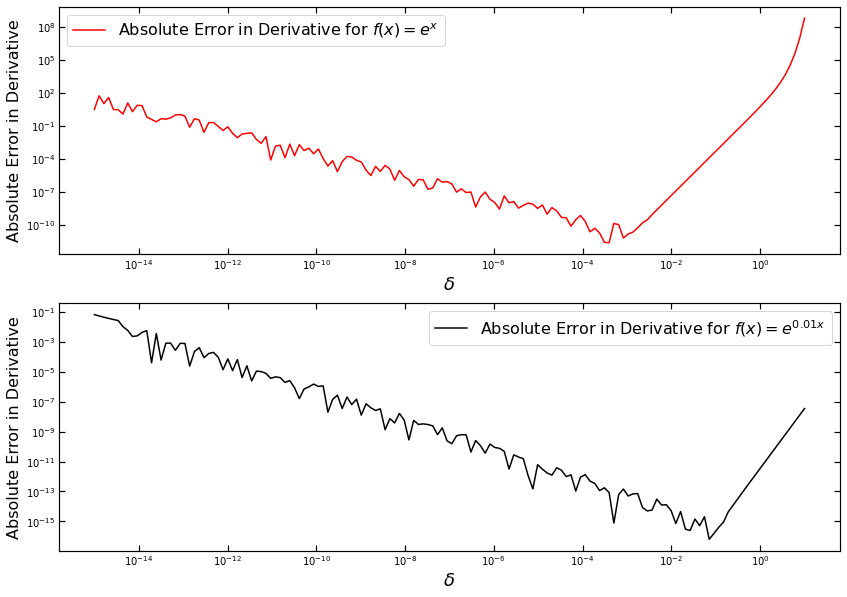

In [70]:
# Plot the absolute error in the derivative for each function and observe how it changes with delta

fig, ax = plt.subplots(2, figsize = (14, 10))

ax[0].plot(delta, abs_err_func1prime, color = 'red',label = 'Absolute Error in Derivative for $f(x) = e^{x}$')
ax[1].plot(delta, abs_err_func2prime, color = 'black',label = 'Absolute Error in Derivative for $f(x) = e^{0.01x}$')
ax[0].set_xlabel(r'$\delta$', fontsize=18)
ax[1].set_xlabel(r'$\delta$', fontsize=18)
ax[0].set_ylabel(r"Absolute Error in Derivative", fontsize=16)
ax[1].set_ylabel(r"Absolute Error in Derivative", fontsize=16)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16);

In [74]:
# We can obtain the delta corresponding to the minima from these two plots 
# and compare to our derived estimate on the optimal delta

double_precision = 1e-16 # assume double precision to be of this order

est_opt_delta_func1 = opt_delta(func1, func1_fifth_deriv, x, double_precision)
est_opt_delta_func2 = opt_delta(func2, func2_fifth_deriv, x, double_precision)
graph_opt_delta_func1 = delta[np.argmin(abs_err_func1prime)]
graph_opt_delta_func2 = delta[np.argmin(abs_err_func2prime)]

print(r"Estimate of optimal delta value for f(x) = exp(x): ", est_opt_delta_func1)
print(r'Estimate of optimal delta value for f(x) = exp(0.01x): ', est_opt_delta_func2)
print(r"Graphically optimal delta value for f(x) = exp(x): ", graph_opt_delta_func1)
print(r'Graphically optimal delta value for f(x) = exp(0.01x): ', graph_opt_delta_func2)

Estimate of optimal delta value for f(x) = exp(x):  0.0010238362555396092
Estimate of optimal delta value for f(x) = exp(0.01x):  0.10238362555396095
Graphically optimal delta value for f(x) = exp(x):  0.00039565388658322604
Graphically optimal delta value for f(x) = exp(0.01x):  0.07117852651001311


Clearly, we see that the estimate from our above approximation yields optimal values of $\delta$ that are in decent agreement with the graphical minima values given they are within an order of magnitude.

# Q2) Write a numerical differentiator:

To derive an expression for the optimal $dx$ we need to consider the Taylor expansion of the centered derivative approximation;\begin{equation}
\frac{f(x+dx) - f(x-dx)}{2dx} = \frac{f(x)-f(x) + f^{'}(x)dx + f^{'}(x)dx + \frac{1}{2}f^{''}(x)dx^2 - \frac{1}{2}f^{''}(x)dx + \frac{1}{6}f^{'''}(x)dx^3 + \frac{1}{6}f^{'''}(x)dx^3 \dots}{2dx} \\  = \frac{2f^{'}(x) + \frac{1}{3}f^{'''}(x)dx^3}{2dx} \\ = f^{'}(x) + \frac{1}{6}f^{'''}(x)dx^2 \end{equation}
which implies our truncation error is therefore $\frac{1}{6}f^{'''}(x)dx^2$. We can add the truncation error to the roundoff error which is the same for the canonical definition of a derivative (assuming the functions to be evaluated will be simple such that $\epsilon_f \approx \epsilon_m$, where $\epsilon_m \approx 10^{-16}$ for a double-precision floating point). Therefore, taking our round-off error to be $\epsilon_m |f(x)/dx|$ our total error is \begin{equation}
\epsilon_{tot} = \epsilon_m |\frac{f(x)}{dx}| + \frac{1}{6}f^{'''}(x)dx^2 \end{equation} which we can differentiate and equate to 0 to find the $dx$ that minimizes $\epsilon_{tot}$. Hence, we get

\begin{equation}
0 = -\epsilon_m \frac{f(x)}{dx^2} +\frac{1}{3}f^{'''}(x)dx \\
dx = (\frac{3\epsilon_m f(x)}{f^{'''}(x)})^{1/3}
\end{equation}

where can take $\frac{f(x)}{f^{'''}(x)} \approx 1$ (as done in class), so $dx = (3\epsilon_m)^{1/3}$. We can use this expression for the optimal $dx$ to compute the derivative of a given function $f$ at a point $x$. The fractional error on a centered derivative would then be 
\begin{equation}
\frac{\epsilon_{tot}}{f^{'}(x)} = \frac{\frac{1}{6}dx^2 f^{'''}(x) + \epsilon_m |\frac{f(x)}{dx}|}{|f^{'}(x)|}, \,\,\, \text{where}\,\,\,\, dx = (\frac{3\epsilon_m f(x)}{f^{'''}(x)})^{1/3} \\
\implies Err_{frac} = \frac{(\frac{3^{-1/3}}{2} + 3^{-1/3})\epsilon_m^{2/3} (f^2(x)f^{'''}(x))^{1/3}}{|f^{'}(x)|} \approx \frac{3^{2/3}}{2}\epsilon_m^{2/3} 
\end{equation}

which we can use to estimate the error on our numerical derivative (taking the assumptions we made in class as to the scale characteristic scale lengths of $f,f^{'},f^{'''}$ being approximately equal).

In [18]:
# define numerical differentiator for a given function f at a point x

def ndiff(fun, x, full=False):
    # need to estimate optimal dx first, use the above reasoning, assume double precision
    
    double_err = 1e-16
    dx = (3*double_err)**(1/3) # take cube root
    deriv = (fun(x+dx) - fun(x-dx)) / (2*dx) # evaluate centered derivative with optimal dx
    
    if full:
        deriv_err = (3**(2/3) / 2)*(double_err)**(2/3) * np.abs(deriv) # error on derivative is fractional error times magnitude of derivative
        return [deriv, dx, deriv_err]
    
    return deriv

In [19]:
def func(x):
    return x**3

In [20]:
sol = ndiff(func, 3, full=False)
sol

27.000000000740005

# Q3) Write a routine that will take an arbitrary voltage and interpolate to return a temperature. Make some sort of quantitative eatimate of the error in your interpolation as well.

In [21]:
dat = np.loadtxt('lakeshore.txt') # first column is temperature, second is corresponding voltage
temp = dat[:,0][::-1]
volt = dat[:,1][::-1]
dV_dT = dat[:,2]

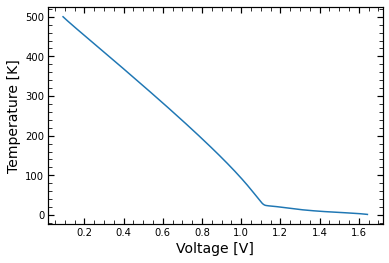

In [22]:
# Plotting temperature as a function of voltage will give us an idea about how to proceed with interpolation

plt.plot(volt, temp)
plt.xlabel('Voltage [V]', fontsize=14)
plt.ylabel('Temperature [K]', fontsize=14);

In [23]:
# Write function that uses cubic spline interpolation

def lakeshore(V, data):
    # parse the input data, flipping each array so voltage increasing
    
    temp, volt, dV_dt = data[:,0][::-1], data[:,1][::-1], data[:,2][::-1]
    volt_interp = V
    spln = interpolate.splrep(volt,temp) # compute cubic splines from original data
    temp_interp = interpolate.splev(volt_interp, spln) # interpolate at V given cubic splines
    
    # now compute the error/uncertainty on the interpolated temperature value
    # do this by fitting a linear function to the data and take the absolute difference
    # this will give a very rough estimate (likely overestimated given simplicity of fit and 
    # non-linearity of function) of the uncertainty
    
    linear_interp = interpolate.interp1d(volt, temp, 'linear')
    temp_interp_err = np.abs(temp_interp - linear_interp(V))
    
    return [temp_interp, temp_interp_err]

In [24]:
print(lakeshore(np.array([0.4, 0.8,1.0]), dat))

[array([368.51045156, 192.44416255,  92.89964098]), array([0.00126454, 0.00851531, 0.02936183])]


# Q4) Take $cos(x), \, x \in [-\pi/2,\pi/2]$ and compare the accuracy of polynomial, cubic spline, and rational function interpolation given some number of points. 

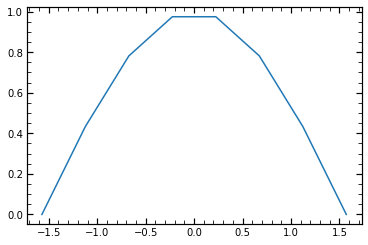

In [56]:
# Define cos(x) over this interval and plot to see shape

x1min = -1*np.pi / 2
x1max = np.pi / 2
npt1 = 8
x1 = np.linspace(x1min, x1max, npt1)
y1 = np.cos(x1)
plt.plot(x1, y1);

In [62]:
def interpolation_three_ways(x, y, n_poly_fit, n_m_rat_fit, interp_pts):
    # function will compute interpolation at interp_pts using a polynomial fit to the n_poly_fit degree, a cubic
    # spline approach, and rational function fit where the [n,m] degrees are given by n_m_rat_fit
    
    # polynomial interpolation
    
    pp = np.polyfit(x, y, n_poly_fit) # fitting polynomial of n_poly_fit degree
    poly_interp = np.polyval(pp, interp_pts) # evaluate interpolation
    
    # cubic spline interpolation
    
    spln = interpolate.splrep(x, y) # compute cubic splines from given data
    spline_interp = interpolate.splev(interp_pts, spln) # evaluate interpolation
    
    # rational function interpolation
    
    n,m = n_m_rat_fit
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat = np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i] = x**i
    for i in range(1,m):
        mat[:,i-1+n] = -y*x**i
    pars = np.linalg.inv(mat)@y
    p = pars[:n]
    q = pars[n:]
    
    top, bot = 0, 1
    for i in range(len(p)):
        top += p[i]*interp_pts**i
    for i in range(len(q)):
        bot += q[i]*interp_pts**(i+1)
    rat_interp = top/bot
    
    return  poly_interp, spline_interp, rat_interp


In [63]:
# We can evaluate the absolute error from each interpolation (take polynomial order = 2 for parabola)

x_interp = 0.5
cos_polynomial_interp, cos_cubic_spline_interp, cos_rat_func_interp = interpolation_three_ways(x1,y1,2,[4,5],x_interp)
cos_true_val = np.cos(x_interp)

cos_err_poly_interp = np.abs(cos_polynomial_interp - cos_true_val)
cos_err_spline_interp = np.abs(cos_cubic_spline_interp - cos_true_val)
cos_err_rat_interp = np.abs(cos_rat_func_interp - cos_true_val)

print(' Polynomial Absolute Error: ', cos_err_poly_interp, '\n', 'Cubic Spline AbsoluteError: ', cos_err_spline_interp, '\n', 
      'Rational Function Absolute Error: ', cos_err_rat_interp)

 Polynomial Absolute Error:  0.006054810964964075 
 Cubic Spline AbsoluteError:  5.134789543426166e-05 
 Rational Function Absolute Error:  1.1124732220424427e-05


# Now try using a Lorentzian $\frac{1}{1+x^2}, \, x \in [-1,1]$. What should error be for Lorentzian from rational function fit. Does what you 

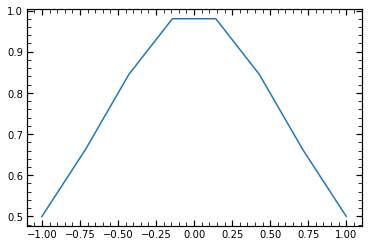

In [66]:
# Define 1/(1+x^2) over this interval and plot to see shape

def lorentz(x):
    return 1/(1+x**2)

x2min = -1.0
x2max = 1.0
npt2 = 8
x2 = np.linspace(x2min, x2max, npt2)
y2 = lorentz(x2)
plt.plot(x2, y2);

In [67]:
# Given we again have a roughly parabolic shape on this interval we can use our interpolation_three_ways 
# with a n_poly_fit of 2

x_interp = 0.5
lor_polynomial_interp, lor_cubic_spline_interp, lor_rat_func_interp = interpolation_three_ways(x2,y2,2,[4,5],x_interp)
lor_true_val = np.cos(x_interp)

lor_err_poly_interp = np.abs(lor_polynomial_interp - lor_true_val)
lor_err_spline_interp = np.abs(lor_cubic_spline_interp - lor_true_val)
lor_err_rat_interp = np.abs(lor_rat_func_interp - lor_true_val)

print(' Polynomial Absolute Error: ', lor_err_poly_interp, '\n', 'Cubic Spline Absolute Error: ', lor_err_spline_interp, '\n', 
      'Rational Function Absolute Error: ', lor_err_rat_interp)

 Polynomial Absolute Error:  0.045618442598666986 
 Cubic Spline Absolute Error:  0.0771606018177774 
 Rational Function Absolute Error:  1.6562666488743778


The error in the rational function fit should in principal be 0 given the Lorentzian is itself a rational function, although given the number of points the rational function fitting algorithm takes is $n+m-1 = 1$ for $(n,m)=(0,2)$, we cannot simultaneously fit a parabola (which requires 3 points) and hence it must fit to higher order if we use the same number of points for all interpolation schemes, which results in a larger absolute error.